<a href="https://colab.research.google.com/github/Arthicsu/ArthicsuGPT/blob/regress-tensorflow-br/Regress_tensorflow_mse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
MSE для Defect_level: 0.0550
MSE для Quality_score: 3.1261


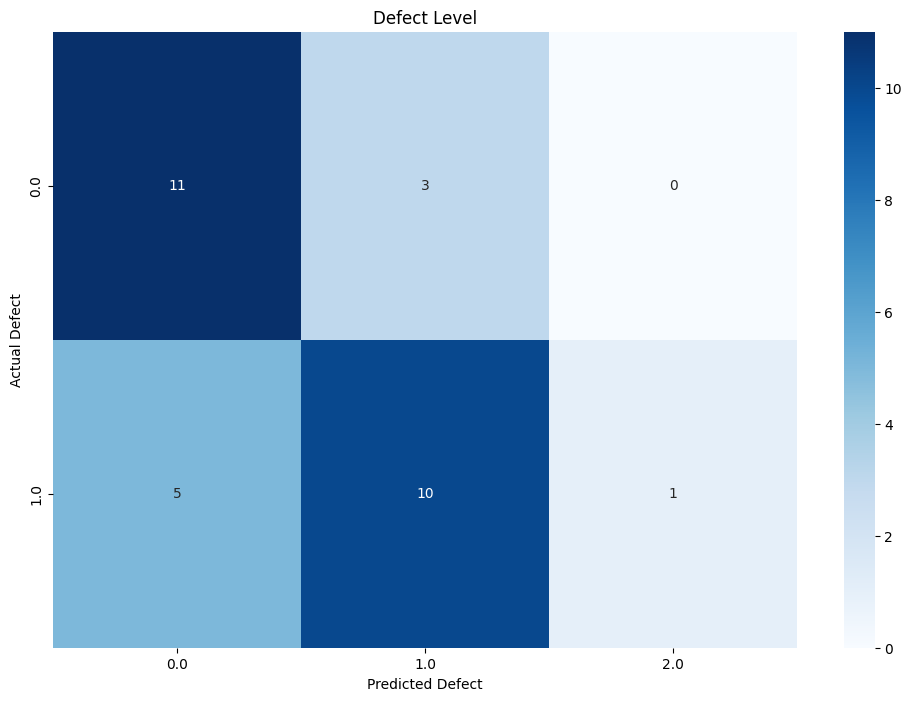

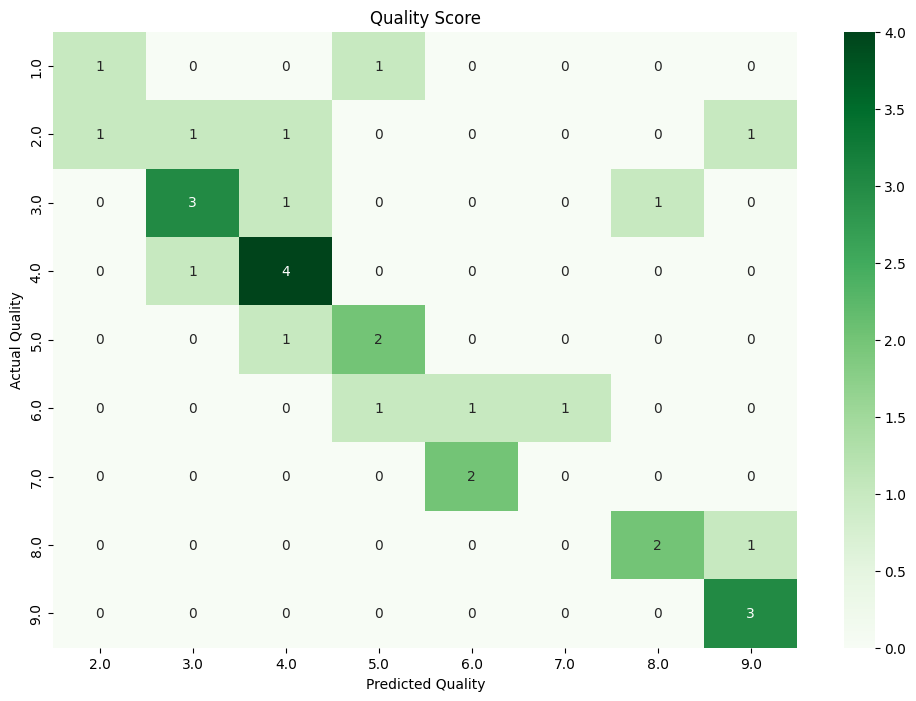

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder #нормализация и кат-е
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import tensorflow as tf

import joblib
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd

test_data = pd.read_excel("/content/test_data.xlsx")
X_test = test_data.drop(["Defect_level", "Quality_score"], axis=1)
y_test = test_data[["Defect_level", "Quality_score"]]

model = tf.keras.models.load_model("/content/display_predictor.keras")
preprocessor = joblib.load("/content/preprocessor.pkl")

X_test_processed = preprocessor.transform(X_test)

y_pred = model.predict(X_test_processed)

mse_defect = mean_squared_error(y_test['Defect_level'], y_pred[:, 0])
mse_quality = mean_squared_error(y_test['Quality_score'], y_pred[:, 1])

print(f"MSE для Defect_level: {mse_defect:.4f}")
print(f"MSE для Quality_score: {mse_quality:.4f}")

y_test_rounded = np.round(y_test.values)
y_pred_rounded = np.round(y_pred)

data = {'Actual_Defect': y_test_rounded[:, 0],
    'Predicted_Defect': y_pred_rounded[:, 0],
    'Actual_Quality': y_test_rounded[:, 1],
    'Predicted_Quality': y_pred_rounded[:, 1]}

df = pd.DataFrame(data)

defect_matrix = pd.crosstab(df['Actual_Defect'], df['Predicted_Defect'], rownames=['Actual Defect'],colnames=['Predicted Defect'])

plt.figure(figsize=(12, 8))
sn.heatmap(defect_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Defect Level')
plt.show()

quality_matrix = pd.crosstab(df['Actual_Quality'], df['Predicted_Quality'], rownames=['Actual Quality'], colnames=['Predicted Quality'])

plt.figure(figsize=(12, 8))
sn.heatmap(quality_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Quality Score')
plt.show()
